In [1]:
#Import pandas
import pandas as pd
#Load the data
df = pd.read_csv('/Users/katie/Documents/KatieProject/EV_Collisions/Electric_Vehicle_Population_Data.csv')

In [2]:
#check data info
df.head() #show the first 5 lines
df.info() #show column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246137 entries, 0 to 246136
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         246137 non-null  object 
 1   County                                             246133 non-null  object 
 2   City                                               246133 non-null  object 
 3   State                                              246137 non-null  object 
 4   Postal Code                                        246133 non-null  float64
 5   Model Year                                         246137 non-null  int64  
 6   Make                                               246137 non-null  object 
 7   Model                                              246137 non-null  object 
 8   Electric Vehicle Type                              246137 non-null  object

In [3]:
#data cleaning
df.isnull().sum() #check for missing data

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        17
Base MSRP                                             17
Legislative District                                 540
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

Findings: There are somes columns contain null values (County, City, Postal Code, Electric Range, Base MSRP, Lesgilative District, Vehicle Location)

In [4]:
#drop irrelevant columns: VIN or unneeded note
df_clean = df.drop(columns=['VIN (1-10)', 'Electric Range', 'Base MSRP', 'Legislative District'])


In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246137 entries, 0 to 246136
Data columns (total 13 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   County                                             246133 non-null  object 
 1   City                                               246133 non-null  object 
 2   State                                              246137 non-null  object 
 3   Postal Code                                        246133 non-null  float64
 4   Model Year                                         246137 non-null  int64  
 5   Make                                               246137 non-null  object 
 6   Model                                              246137 non-null  object 
 7   Electric Vehicle Type                              246137 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  246137 non-null  object

In [6]:
#convert date:
df_clean['Model Year'] = pd.to_datetime(df_clean['Model Year'], format='%Y')


In [7]:
#Analyzing: 
#How many EVs are registered in Washington overall?
# EVs by county
ev_by_county = df_clean['County'].value_counts()
#counts how many EVs are registered in each county in Washington
overall_EV = ev_by_county.sum()
print(f"Total number of electric vehicles registered in Washington: {overall_EV:,}")

#Which counties have the most EVs?
top_county = ev_by_county.idxmax()   # County name
top_count = ev_by_county.max()       # EV count

print(f"The county with the most EVs is {top_county} with {top_count:,} registered EVs.")

#What are the top EV makes (Tesla, Nissan, etc.)?

# Top 10 makes

top_makes = df_clean['Make'].value_counts().head(10)

# Display top 10 EV manufacturers with formatted output
print("The manufacturers with the most EVs are:\n")
print(top_makes)


#Are BEVs (Battery Electric Vehicles) or PHEVs (Plug-In Hybrid Electric Vehicles) more popular?
#How has a

Total number of electric vehicles registered in Washington: 246,133
The county with the most EVs is King with 123,557 registered EVs.
The manufacturers with the most EVs are:

Make
TESLA        104100
CHEVROLET     17771
NISSAN        15772
FORD          13158
KIA           12019
BMW           10141
TOYOTA         9999
HYUNDAI        7906
RIVIAN         7332
JEEP           6697
Name: count, dtype: int64


In [8]:
# Total vehicles by year
df_clean['Model Year'] = df_clean['Model Year'].astype(int)
ev_by_year = df_clean.groupby('Model Year').size() 
#groups all the rows (vehicles) in the dataset by the year the EV model was made (Model Year), and counts how many EVs belong to each year.

# EVs by county
ev_by_county = df_clean['County'].value_counts()
#counts how many EVs are registered in each county in Washington

# Top 10 makes
top_makes = df_clean['Make'].value_counts().head(10)
#finds the top 10 most common vehicle manufacturers (like Tesla, Nissan, Chevrolet, etc.) in the dataset.


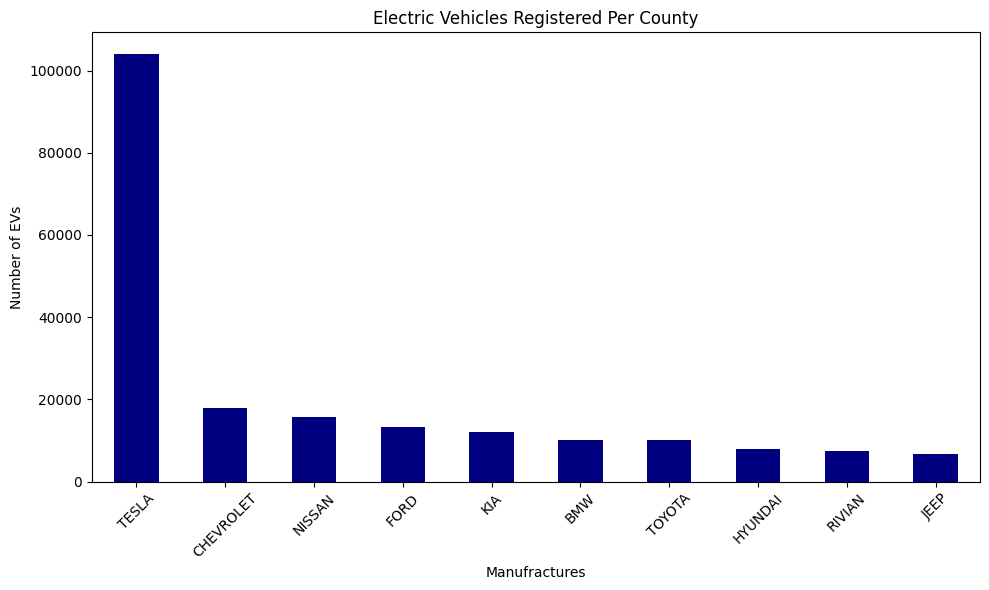

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 makes
plt.figure(figsize=(10,6))
top_makes.plot(kind='bar', color='navy')
plt.title("Electric Vehicles Registered Per County")
plt.ylabel("Number of EVs")
plt.xlabel("Manufractures")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./top10.png')
plt.show()


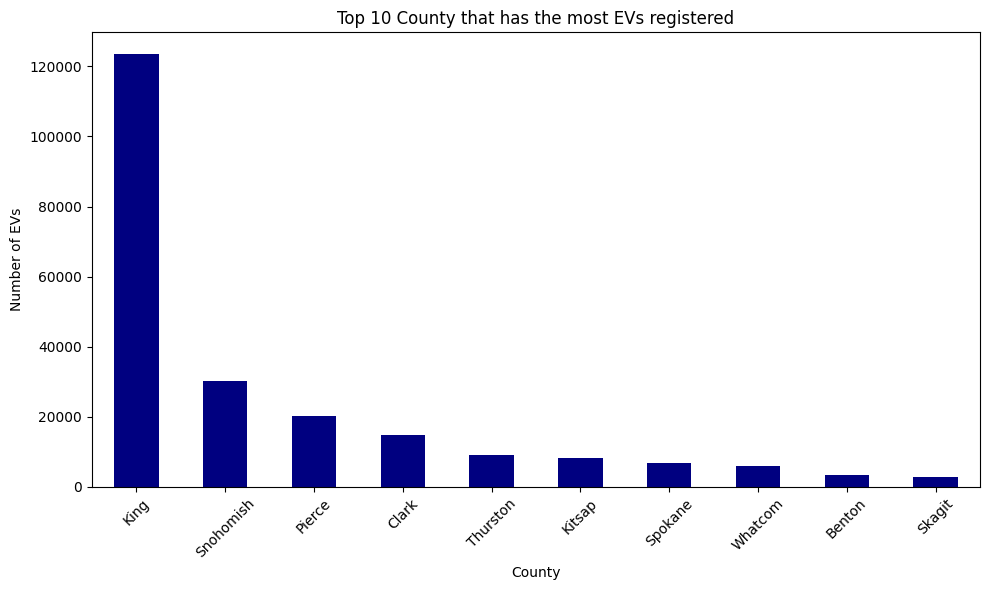

In [10]:
# EVs by County
plt.figure(figsize=(10,6))
ev_by_county.head(10).plot(kind='bar', color='navy')
plt.title("Top 10 County that has the most EVs registered")
plt.ylabel("Number of EVs")
plt.xlabel("County")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./ev_by_county.png')
plt.show()


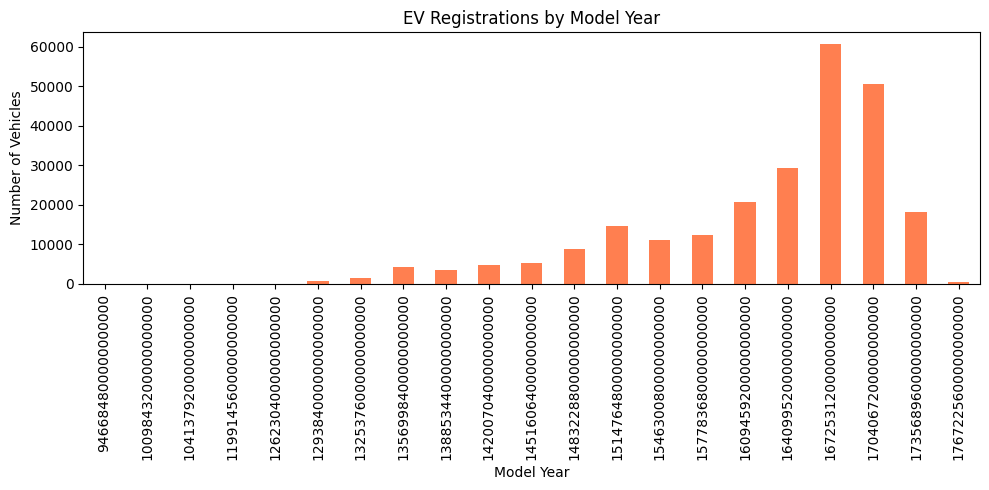

In [11]:
# --- EV Growth Over Time ---

plt.figure(figsize=(10, 5))
ev_by_year.plot(kind='bar', color='coral')
plt.title("EV Registrations by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.tight_layout()
plt.savefig('./ev_by_year.png')
plt.show()